In [1]:
## Previsão de serie temporal 

In [213]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.stattools import adfuller
import datetime

In [122]:
df_base = pd.read_csv("/Users/railtonsabtos/Desktop/Biosev/base.csv", header=None)
df_base.columns = ["Data", "Valor"]
df_base.head()

,Data,Valor
0,1/1/1931,"62,008"
1,2/1/1931,"92,361"
2,3/1/1931,"95,774"
3,4/1/1931,"71,680"
4,5/1/1931,"49,194"


In [123]:
#verificando as infos do dataframe
df_base.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1032 non-null   object
 1   Valor   1032 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


In [130]:
#convertendo em data
df_base['Data'] =  pd.to_datetime(df_base['Data'], format='%m/%d/%Y')
df_base['Valor'] = df_base['Valor'].str.replace(',', '.')
df_base['Valor'] = df_base['Valor'].astype(float)
df_base.head()


,Data,Valor
0,1931-01-01,62.008
1,1931-02-01,92.361
2,1931-03-01,95.774
3,1931-04-01,71.680
4,1931-05-01,49.194


In [131]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    1032 non-null   datetime64[ns]
 1   Valor   1032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.2 KB


In [132]:
#mudando a indexançao do dataframe
df_base.set_index('Data', inplace=True)
df_base.head()

,Valor
Data,
1931-01-01,62.008
1931-02-01,92.361
1931-03-01,95.774
1931-04-01,71.680
1931-05-01,49.194


In [133]:
#verificando ser é estacionaria
stat_test = adfuller(df_base['Valor'])
test_result = pd.Series(stat_test[0:4], index = ['Test statistics', 'p-value', 'Lags Used', 'Number of used observations'])
test_result

Test statistics                  -3.682007
p-value                           0.004373
Lags Used                        22.000000
Number of used observations    1009.000000
dtype: float64

In [110]:
#Caso p-value > 0.05: Série não é estacionária e deve ser manipulada.
#Caso p-value <= 0.05: Série é estacionária e a predição pode ser realizada.

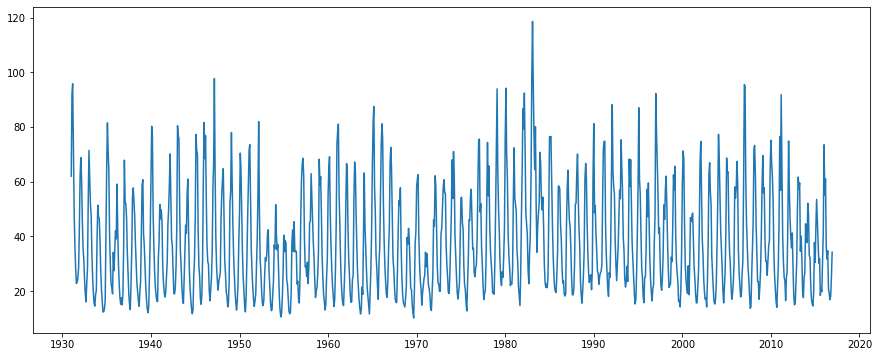

In [134]:
plt.figure(figsize = (15,6))
plt.plot(df_base)

In [227]:
#Modelo ARIMA
arima = ARIMA(df_base.Valor, freq = 'MS', order=(3,0,2)).fit()
error = (arima.resid **2).mean()
error

63.167237027559814

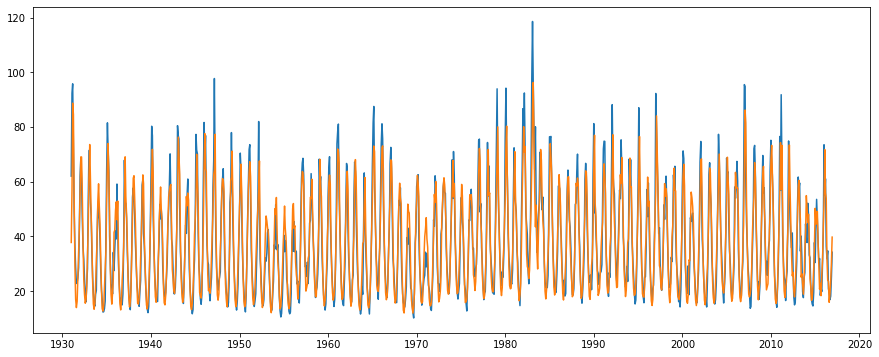

In [238]:
plt.figure(figsize = (15,6))
plt.plot(df_base)
plt.plot(arima.predict())

In [240]:
#Previsão

fc, se, conf = arima.forecast(12, alpha = 0.2) 

date = '2016-12-01'
last_date = datetime.datetime.strptime(date,'%Y-%m-%d')
forecast_index = []
for i in range(len(fc)): 
    next_date = last_date + pd.DateOffset(months = 1)
    forecast_index.append(next_date)
    last_date = next_date

forecast_series = pd.Series(fc, index = forecast_index)
forecast_series

2017-01-01    47.619316
2017-02-01    55.117436
2017-03-01    55.876887
2017-04-01    50.462458
2017-05-01    40.809608
2017-06-01    29.810442
2017-07-01    20.604808
2017-08-01    15.780692
2017-09-01    16.707139
2017-10-01    23.184096
2017-11-01    33.506539
2017-12-01    44.927966
dtype: float64